# Video Emotion Detection

**Importing Libraries**

In [8]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.13.0


**Exploring Dataset**

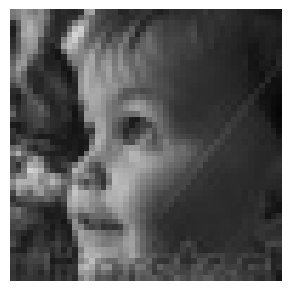

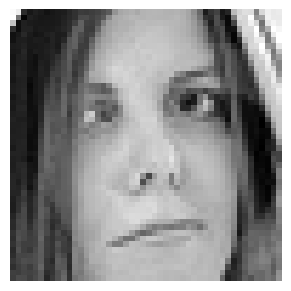

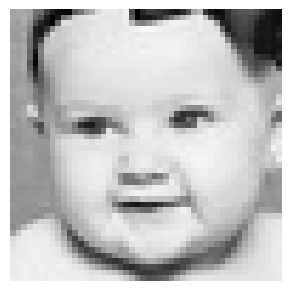

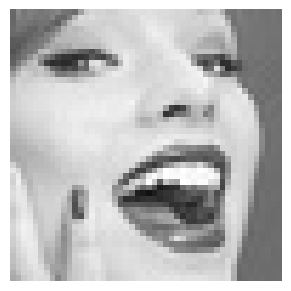

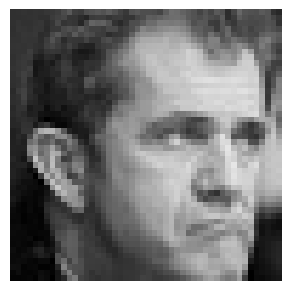

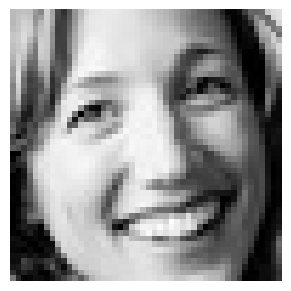

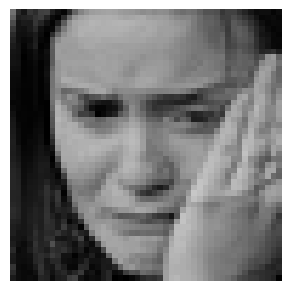

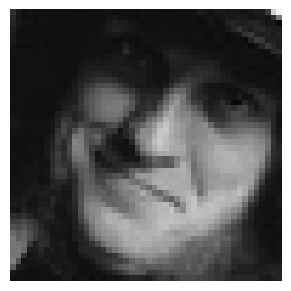

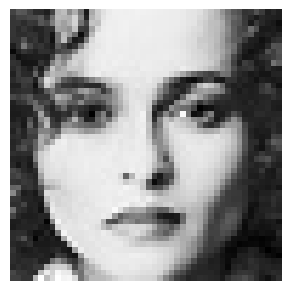

In [9]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')           

**Preparing Data for Training**

In [13]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator(rescale=1./255)
train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size = (img_size,img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)
datagen_validation = ImageDataGenerator(rescale=1./255)
validation_generator = datagen_train.flow_from_directory("test/",
                                                     target_size = (img_size,img_size),
                                                     color_mode = "grayscale",
                                                     batch_size = batch_size,
                                                     class_mode = "categorical",
                                                     shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Defining Model**

In [14]:
ved_model = Sequential()
ved_model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
ved_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
ved_model.add(MaxPooling2D(pool_size=(2,2)))
ved_model.add(Dropout(0.25))

ved_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
ved_model.add(MaxPooling2D(pool_size=(2,2)))
ved_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
ved_model.add(MaxPooling2D(pool_size=(2,2)))
ved_model.add(Dropout(0.25))

ved_model.add(Flatten())
ved_model.add(Dense(1024, activation='relu'))
ved_model.add(Dropout(0.25))
ved_model.add(Dense(7, activation='softmax'))

ved_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

**Training the Model**

In [15]:
ved_model_info = ved_model.fit_generator(
    train_generator,
    steps_per_epoch = 28709//64,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 7178//64)

C:\Users\BIKASH CHANDRA SAHAN\AppData\Local\Temp\ipykernel_2792\904970809.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  ved_model_info = ved_model.fit_generator(


Epoch 1/15
448/448 [==============================] - 272s 602ms/step - loss: 1.7761 - accuracy: 0.2762 - val_loss: 1.6409 - val_accuracy: 0.3620
Epoch 2/15
448/448 [==============================] - 257s 573ms/step - loss: 1.5847 - accuracy: 0.3891 - val_loss: 1.5079 - val_accuracy: 0.4230
Epoch 3/15
448/448 [==============================] - 229s 511ms/step - loss: 1.4899 - accuracy: 0.4313 - val_loss: 1.4241 - val_accuracy: 0.4605
Epoch 4/15
448/448 [==============================] - 176s 393ms/step - loss: 1.4135 - accuracy: 0.4628 - val_loss: 1.3703 - val_accuracy: 0.4894
Epoch 5/15
448/448 [==============================] - 176s 392ms/step - loss: 1.3582 - accuracy: 0.4851 - val_loss: 1.3186 - val_accuracy: 0.4996
Epoch 6/15
448/448 [==============================] - 113s 252ms/step - loss: 1.3072 - accuracy: 0.5048 - val_loss: 1.2840 - val_accuracy: 0.5112
Epoch 7/15
448/448 [==============================] - 100s 224ms/step - loss: 1.2629 - accuracy: 0.5240 - val_loss: 1.2527 -

**Saving the Model**

In [16]:
model_json = ved_model.to_json()
with open("ved_model.json", "w") as json_file:
    json_file.write(model_json)

In [17]:
ved_model.save_weights('ved_model.h5')

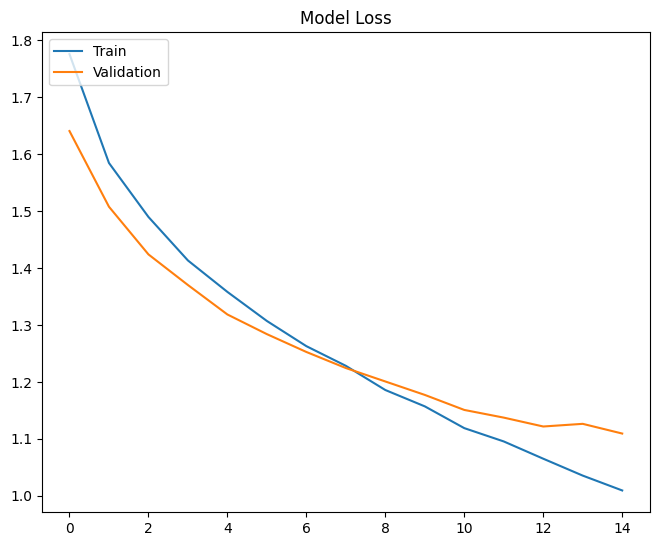

In [24]:
history = ved_model_info
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,
                    left=0.0,hspace=0.25,wspace=0.35)


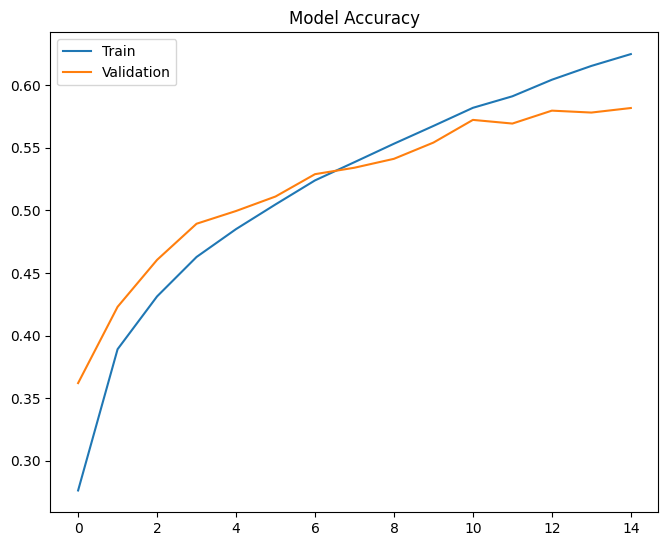

In [25]:
history = ved_model_info
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,
                    left=0.0,hspace=0.25,wspace=0.35)